# 🎯 Logistic Regression - Classification Fundamentals

**Module 02: Classification Algorithms (Supervised Learning)**

---

## 🎯 Learning Objectives

By the end of this notebook, you will understand:

1. **Binary Classification** - Predicting categorical outcomes (0 or 1)
2. **Sigmoid Function** - Converting linear outputs to probabilities
3. **Log Loss (Cross-Entropy)** - Why we don't use MSE for classification
4. **Decision Boundary** - How logistic regression separates classes
5. **Multi-class Classification** - One-vs-Rest and Multinomial strategies
6. **Regularization (L1/L2)** - Preventing overfitting in classification
7. **Evaluation Metrics** - Accuracy, Precision, Recall, F1, ROC-AUC

## 📚 Section 1: Theoretical Foundation

### Why Not Linear Regression for Classification?

**Problem with Linear Regression:**
```
Linear: ŷ = β₀ + β₁x  (Can output any value: -∞ to +∞)

But we need: Probability between 0 and 1
```

**Example Issue:**
```
      ŷ
  1.5 |     × (Invalid probability!)
  1.0 |─────────────── (Class 1)
  0.5 |
  0.0 |─────────────── (Class 0)
 -0.5 |     × (Invalid probability!)
```

---

### 🔵 The Sigmoid (Logistic) Function

**Solution:** Transform linear output to [0, 1] range using sigmoid

**Formula:**
```
σ(z) = 1 / (1 + e^(-z))

where z = β₀ + β₁x₁ + β₂x₂ + ... (linear combination)
```

**Properties:**
- Input: Any real number (-∞, +∞)
- Output: Probability (0, 1)
- σ(0) = 0.5 (decision boundary)
- σ(+∞) → 1 (approaches 1)
- σ(-∞) → 0 (approaches 0)
- S-shaped curve

**Visual:**
```
  P(y=1)
    1 ┤         ╭─────
      │       ╭─╯
  0.5 ┤     ╭─╯  ← Decision boundary
      │   ╭─╯
    0 ┤─╯─────
      └──────────── z
```

---

### 📊 From Linear to Logistic

**Linear Regression:**
```
ŷ = β₀ + β₁x₁ + β₂x₂
Output: Continuous value
```

**Logistic Regression:**
```
z = β₀ + β₁x₁ + β₂x₂         (logit)
P(y=1|x) = σ(z) = 1/(1+e^(-z)) (probability)
ŷ = 1 if P(y=1|x) ≥ 0.5, else 0 (prediction)
```

---

### 🎯 Decision Boundary

**Decision boundary occurs when P(y=1) = 0.5:**
```
σ(z) = 0.5
→ z = 0
→ β₀ + β₁x₁ + β₂x₂ = 0
```

**Geometric Interpretation (2D):**
```
  x₂
   |    • • • (Class 1)
   |   • • •
   |  ─────────── ← Decision boundary (z=0)
   | ○ ○ ○
   |○ ○ ○ (Class 0)
   |________________ x₁
```

- **Linear boundary** (straight line/plane)
- Points above: Predict Class 1
- Points below: Predict Class 0

---

### 📉 Cost Function: Log Loss (Binary Cross-Entropy)

**Why not MSE?**
- MSE is non-convex for logistic regression
- Can have multiple local minima
- Gradient descent may not converge

**Log Loss (Cross-Entropy):**
```
L(y, ŷ) = -[y log(ŷ) + (1-y) log(1-ŷ)]

For entire dataset:
Cost = -(1/n) Σ[yᵢ log(ŷᵢ) + (1-yᵢ) log(1-ŷᵢ)]
```

**Intuition:**
- If y=1 and ŷ→1: Loss → 0 (good!)
- If y=1 and ŷ→0: Loss → ∞ (bad!)
- If y=0 and ŷ→0: Loss → 0 (good!)
- If y=0 and ŷ→1: Loss → ∞ (bad!)

**Properties:**
- Convex (single global minimum)
- Penalizes confident wrong predictions heavily
- Gradient descent converges reliably

---

### ⚖️ Regularization in Logistic Regression

**L2 Regularization (Ridge):**
```
Cost = Log Loss + C⁻¹ × Σβⱼ²
```
- Parameter: C (inverse of regularization strength)
- High C = Less regularization (more complex)
- Low C = More regularization (simpler)

**L1 Regularization (Lasso):**
```
Cost = Log Loss + C⁻¹ × Σ|βⱼ|
```
- Creates sparse models (feature selection)
- Some coefficients become exactly zero

**ElasticNet (L1 + L2):**
```
Cost = Log Loss + C⁻¹ × [l1_ratio × Σ|βⱼ| + (1-l1_ratio) × Σβⱼ²]
```
- Combines both penalties

---

### 🎨 Multi-Class Classification Strategies

#### 1. **One-vs-Rest (OvR)** - Default in sklearn
```
Train K binary classifiers (K = number of classes)
Class 1 vs (2,3,4)
Class 2 vs (1,3,4)
Class 3 vs (1,2,4)
Class 4 vs (1,2,3)

Prediction: Choose class with highest probability
```

#### 2. **Multinomial (Softmax)**
```
Single model with softmax activation
Outputs K probabilities that sum to 1

P(y=k|x) = e^(zₖ) / Σe^(zⱼ)

More principled for multi-class
```

---

### 📊 When to Use Logistic Regression?

| **Use Logistic Regression When** | **Avoid When** |
|----------------------------------|----------------|
| Binary or multi-class classification | Regression tasks |
| Need probability estimates | Only need hard predictions |
| Want interpretable coefficients | Need to capture complex non-linear patterns |
| Linear decision boundary sufficient | Classes are not linearly separable |
| Baseline/benchmark model | Very high-dimensional data |
| Fast training/prediction needed | Imbalanced classes (without adjustment) |

## 🔧 Section 2: Setup & Dataset Loading

In [4]:
# Import Essential Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer, load_wine, load_iris, make_classification
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve, roc_auc_score,
    precision_recall_curve, average_precision_score
)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


### 2.1 Binary Classification: Breast Cancer Dataset

In [7]:
# Load Breast Cancer Dataset (Binary Classification)
cancer = load_breast_cancer(as_frame=True)
df_cancer = cancer.frame

print("📊 Breast Cancer Dataset (Binary Classification)")
print(f"Shape: {df_cancer.shape}")
print(f"Features: {len(cancer.feature_names)}")
print(f"Classes: {cancer.target_names.tolist()}")
print(f"\nTarget Distribution:")
print(df_cancer['target'].value_counts())
print(f"\nClass Balance: {(df_cancer['target'].value_counts(normalize=True) * 100).round(2).to_dict()}")
print("\n" + "="*70)
print(df_cancer.head())

📊 Breast Cancer Dataset (Binary Classification)
Shape: (569, 31)
Features: 30
Classes: ['malignant', 'benign']

Target Distribution:
target
1    357
0    212
Name: count, dtype: int64

Class Balance: {1: 62.74, 0: 37.26}

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390  

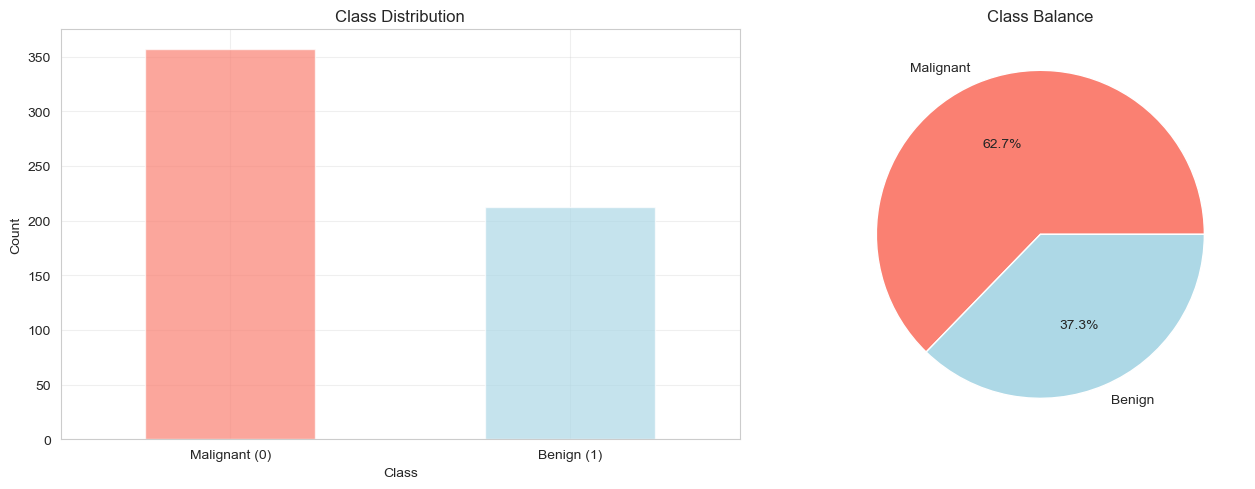

In [9]:
# Visualize class distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
df_cancer['target'].value_counts().plot(kind='bar', ax=axes[0], alpha=0.7, 
                                        color=['salmon', 'lightblue'])
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Count')
axes[0].set_title('Class Distribution')
axes[0].set_xticklabels(['Malignant (0)', 'Benign (1)'], rotation=0)
axes[0].grid(True, alpha=0.3)

# Pie chart
df_cancer['target'].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%',
                                        labels=['Malignant', 'Benign'],
                                        colors=['salmon', 'lightblue'])
axes[1].set_ylabel('')
axes[1].set_title('Class Balance')

plt.tight_layout()
plt.show()

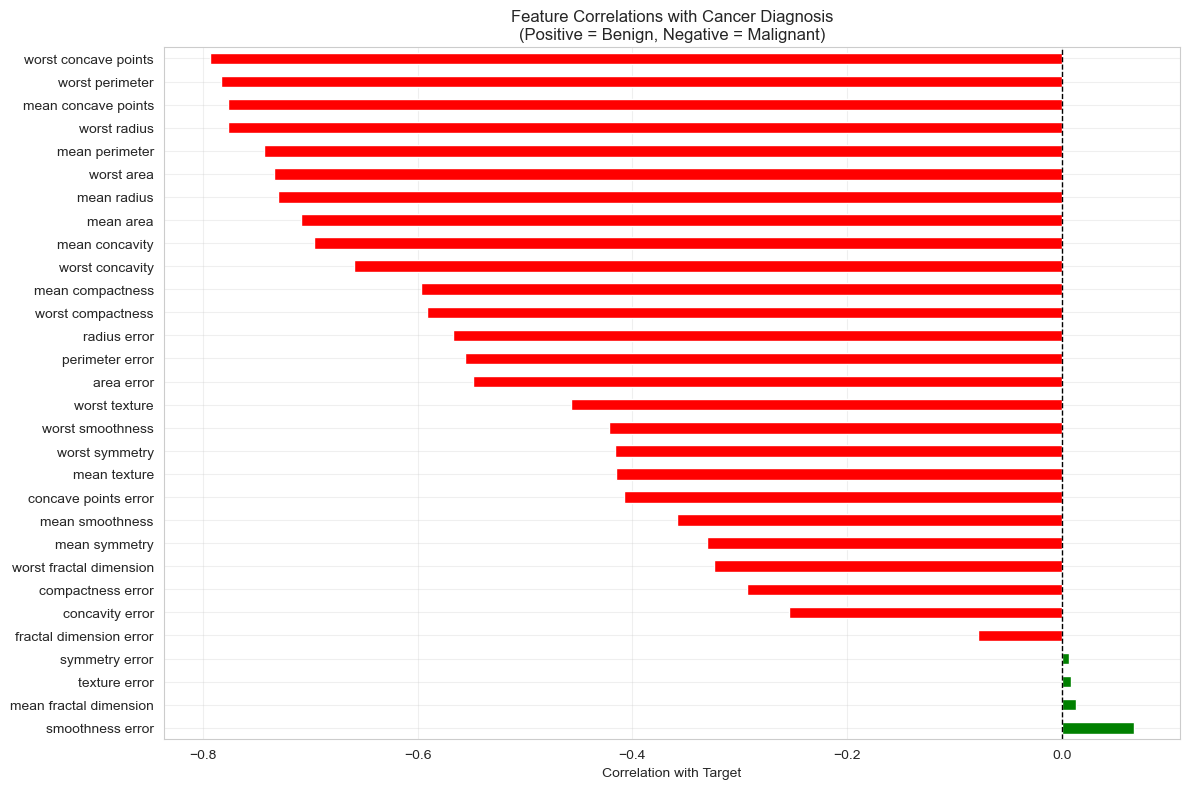


🔍 Top 5 Most Correlated Features:
smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972


In [11]:
# Feature correlation with target
correlations = df_cancer.corr()['target'].drop('target').sort_values(ascending=False)

plt.figure(figsize=(12, 8))
correlations.plot(kind='barh', color=['green' if x > 0 else 'red' for x in correlations])
plt.xlabel('Correlation with Target')
plt.title('Feature Correlations with Cancer Diagnosis\n(Positive = Benign, Negative = Malignant)')
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n🔍 Top 5 Most Correlated Features:")
print(correlations.head().to_string())

In [13]:
# Split data for binary classification
X_cancer = df_cancer.drop('target', axis=1)
y_cancer = df_cancer['target']

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_cancer, y_cancer, test_size=0.2, random_state=42, stratify=y_cancer
)

print(f"\n✂️ Binary Classification Data Split:")
print(f"Training: {X_train_c.shape[0]} samples")
print(f"Testing: {X_test_c.shape[0]} samples")
print(f"Features: {X_train_c.shape[1]}")

# Feature scaling
scaler_c = StandardScaler()
X_train_c_scaled = scaler_c.fit_transform(X_train_c)
X_test_c_scaled = scaler_c.transform(X_test_c)

print("\n⚖️ Features Standardized")


✂️ Binary Classification Data Split:
Training: 455 samples
Testing: 114 samples
Features: 30

⚖️ Features Standardized


### 2.2 Multi-Class Classification: Wine Dataset

In [16]:
# Load Wine Dataset (Multi-class Classification)
wine = load_wine(as_frame=True)
df_wine = wine.frame

print("\n📊 Wine Dataset (Multi-class Classification)")
print(f"Shape: {df_wine.shape}")
print(f"Features: {len(wine.feature_names)}")
print(f"Classes: {wine.target_names.tolist()}")
print(f"\nTarget Distribution:")
print(df_wine['target'].value_counts().sort_index())
print("\n" + "="*70)
print(df_wine.head())


📊 Wine Dataset (Multi-class Classification)
Shape: (178, 14)
Features: 13
Classes: ['class_0', 'class_1', 'class_2']

Target Distribution:
target
0    59
1    71
2    48
Name: count, dtype: int64

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49          

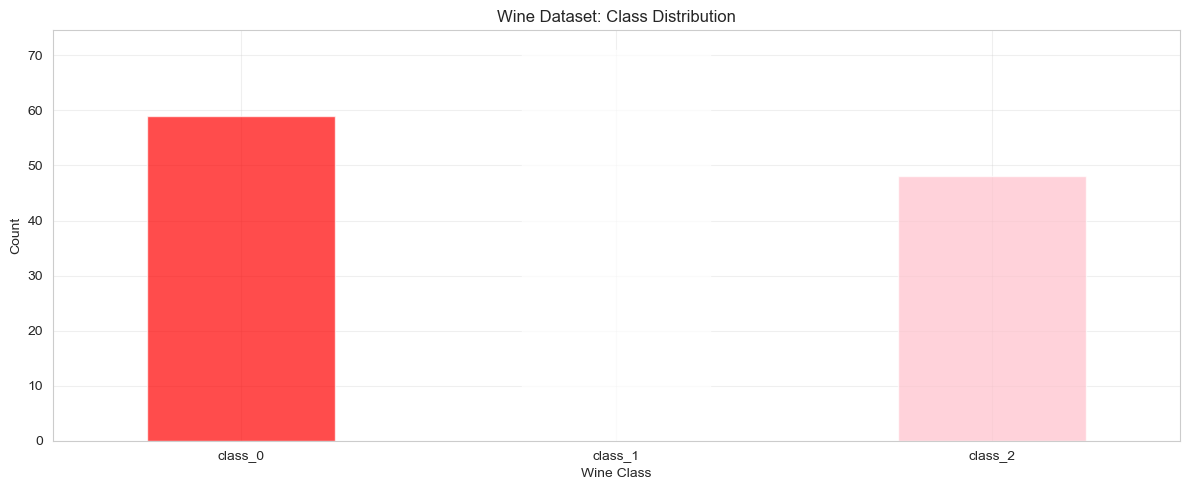

In [18]:
# Visualize wine classes
plt.figure(figsize=(12, 5))

# Count plot
ax = df_wine['target'].value_counts().sort_index().plot(kind='bar', alpha=0.7,
                                                         color=['red', 'white', 'pink'])
plt.xlabel('Wine Class')
plt.ylabel('Count')
plt.title('Wine Dataset: Class Distribution')
plt.xticks([0, 1, 2], wine.target_names, rotation=0)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [20]:
# Split data for multi-class classification
X_wine = df_wine.drop('target', axis=1)
y_wine = df_wine['target']

X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(
    X_wine, y_wine, test_size=0.2, random_state=42, stratify=y_wine
)

# Feature scaling
scaler_w = StandardScaler()
X_train_w_scaled = scaler_w.fit_transform(X_train_w)
X_test_w_scaled = scaler_w.transform(X_test_w)

print(f"\n✂️ Multi-class Classification Data Split:")
print(f"Training: {X_train_w.shape[0]} samples")
print(f"Testing: {X_test_w.shape[0]} samples")
print(f"Classes: {len(np.unique(y_wine))}")


✂️ Multi-class Classification Data Split:
Training: 142 samples
Testing: 36 samples
Classes: 3


## 🧪 Section 3: Binary Classification - Sigmoid & Decision Boundary

### 3.1 Understanding the Sigmoid Function

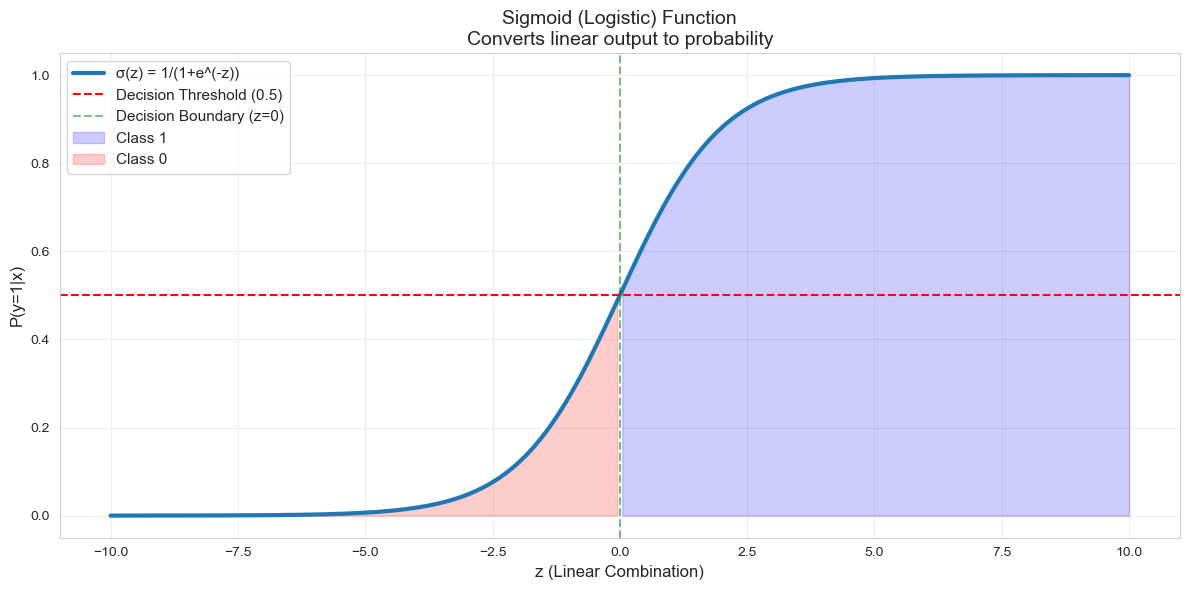

📊 Sigmoid Function Properties:
  σ(-10) = 0.000045 ≈ 0 (Strong Class 0)
  σ(-2)  = 0.1192
  σ(0)   = 0.5000 (Decision boundary)
  σ(2)   = 0.8808
  σ(10)  = 0.999955 ≈ 1 (Strong Class 1)


In [24]:
# Visualize sigmoid function
z = np.linspace(-10, 10, 200)
sigmoid = 1 / (1 + np.exp(-z))

plt.figure(figsize=(12, 6))
plt.plot(z, sigmoid, linewidth=3, label='σ(z) = 1/(1+e^(-z))')
plt.axhline(y=0.5, color='r', linestyle='--', label='Decision Threshold (0.5)')
plt.axvline(x=0, color='g', linestyle='--', alpha=0.5, label='Decision Boundary (z=0)')
plt.fill_between(z, 0, sigmoid, where=(sigmoid >= 0.5), alpha=0.2, color='blue', label='Class 1')
plt.fill_between(z, 0, sigmoid, where=(sigmoid < 0.5), alpha=0.2, color='red', label='Class 0')
plt.xlabel('z (Linear Combination)', fontsize=12)
plt.ylabel('P(y=1|x)', fontsize=12)
plt.title('Sigmoid (Logistic) Function\nConverts linear output to probability', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("📊 Sigmoid Function Properties:")
print(f"  σ(-10) = {1/(1+np.exp(10)):.6f} ≈ 0 (Strong Class 0)")
print(f"  σ(-2)  = {1/(1+np.exp(2)):.4f}")
print(f"  σ(0)   = {1/(1+np.exp(0)):.4f} (Decision boundary)")
print(f"  σ(2)   = {1/(1+np.exp(-2)):.4f}")
print(f"  σ(10)  = {1/(1+np.exp(-10)):.6f} ≈ 1 (Strong Class 1)")

### 3.2 Training Binary Logistic Regression

In [27]:
# Train basic logistic regression (binary)
log_reg_binary = LogisticRegression(random_state=42, max_iter=10000)
log_reg_binary.fit(X_train_c_scaled, y_train_c)

# Predictions
y_pred_c = log_reg_binary.predict(X_test_c_scaled)
y_pred_proba_c = log_reg_binary.predict_proba(X_test_c_scaled)

# Evaluate
accuracy_c = accuracy_score(y_test_c, y_pred_c)
precision_c = precision_score(y_test_c, y_pred_c)
recall_c = recall_score(y_test_c, y_pred_c)
f1_c = f1_score(y_test_c, y_pred_c)

print("📊 Binary Logistic Regression Performance:")
print(f"Accuracy:  {accuracy_c:.4f}")
print(f"Precision: {precision_c:.4f} (Of predicted Benign, how many are correct)")
print(f"Recall:    {recall_c:.4f} (Of actual Benign, how many were found)")
print(f"F1 Score:  {f1_c:.4f} (Harmonic mean of Precision & Recall)")

print(f"\n📐 Model Parameters:")
print(f"Intercept: {log_reg_binary.intercept_[0]:.4f}")
print(f"Number of coefficients: {len(log_reg_binary.coef_[0])}")

📊 Binary Logistic Regression Performance:
Accuracy:  0.9825
Precision: 0.9861 (Of predicted Benign, how many are correct)
Recall:    0.9861 (Of actual Benign, how many were found)
F1 Score:  0.9861 (Harmonic mean of Precision & Recall)

📐 Model Parameters:
Intercept: 0.3022
Number of coefficients: 30


### 3.3 Probability Predictions & Confidence

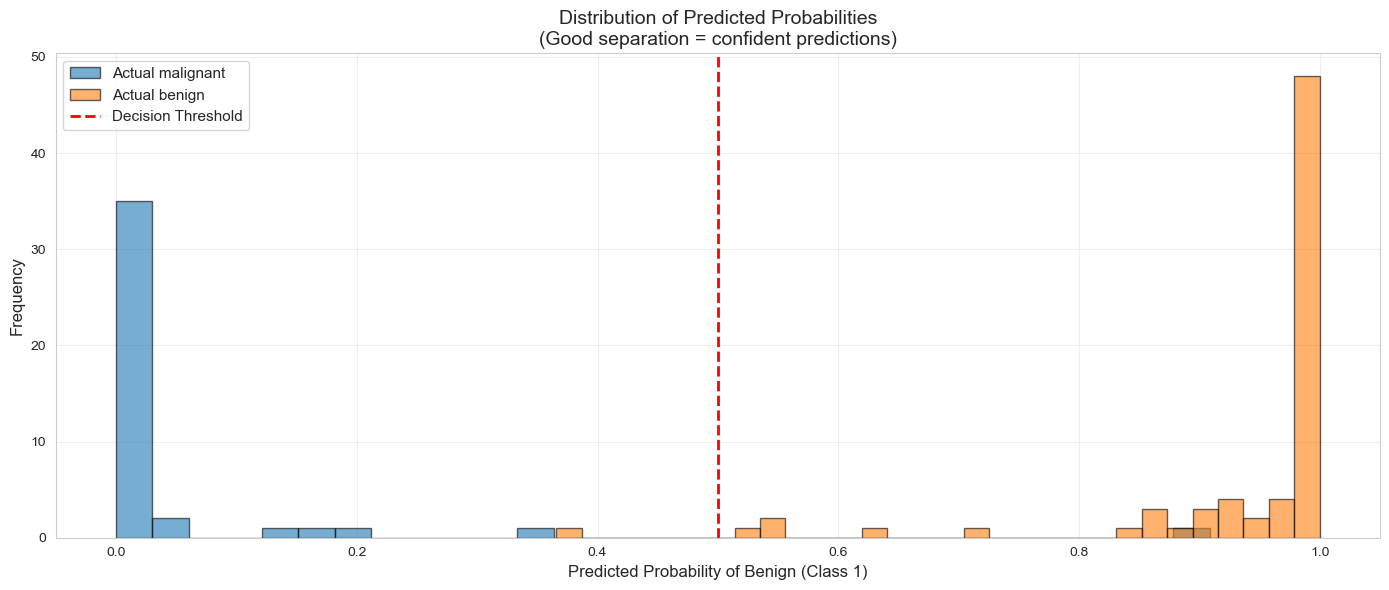


🔍 Sample Predictions with Confidence:
Sample 0:
  Actual: malignant
  Predicted: malignant
  Confidence: Malignant=100.00%, Benign=0.00%
  ✅ Correct

Sample 10:
  Actual: benign
  Predicted: benign
  Confidence: Malignant=1.08%, Benign=98.92%
  ✅ Correct

Sample 20:
  Actual: malignant
  Predicted: malignant
  Confidence: Malignant=99.83%, Benign=0.17%
  ✅ Correct

Sample 30:
  Actual: benign
  Predicted: benign
  Confidence: Malignant=0.81%, Benign=99.19%
  ✅ Correct

Sample 40:
  Actual: benign
  Predicted: benign
  Confidence: Malignant=0.01%, Benign=99.99%
  ✅ Correct



In [30]:
# Analyze probability distributions
plt.figure(figsize=(14, 6))

# Histogram of predicted probabilities for each class
for class_label in [0, 1]:
    class_mask = y_test_c == class_label
    probs = y_pred_proba_c[class_mask, 1]
    
    plt.hist(probs, bins=30, alpha=0.6, label=f'Actual {cancer.target_names[class_label]}',
             edgecolor='black')

plt.axvline(x=0.5, color='red', linestyle='--', linewidth=2, label='Decision Threshold')
plt.xlabel('Predicted Probability of Benign (Class 1)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Predicted Probabilities\n(Good separation = confident predictions)', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Show some predictions with confidence
print("\n🔍 Sample Predictions with Confidence:")
print("="*70)
sample_indices = [0, 10, 20, 30, 40]
for idx in sample_indices:
    actual = y_test_c.iloc[idx]
    pred = y_pred_c[idx]
    prob_class_0 = y_pred_proba_c[idx, 0]
    prob_class_1 = y_pred_proba_c[idx, 1]
    
    print(f"Sample {idx}:")
    print(f"  Actual: {cancer.target_names[actual]}")
    print(f"  Predicted: {cancer.target_names[pred]}")
    print(f"  Confidence: Malignant={prob_class_0:.2%}, Benign={prob_class_1:.2%}")
    print(f"  {'✅ Correct' if actual == pred else '❌ Wrong'}")
    print()

### 3.4 Visualizing Decision Boundary (2D Projection)

In [33]:
# Visualize decision boundary using first 2 features
# Train on 2 features for visualization
X_train_2d = X_train_c_scaled[:, :2]
X_test_2d = X_test_c_scaled[:, :2]

log_reg_2d = LogisticRegression(random_state=42)
log_reg_2d.fit(X_train_2d, y_train_c)

# Create mesh for decision boundary
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

Z = log_reg_2d.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

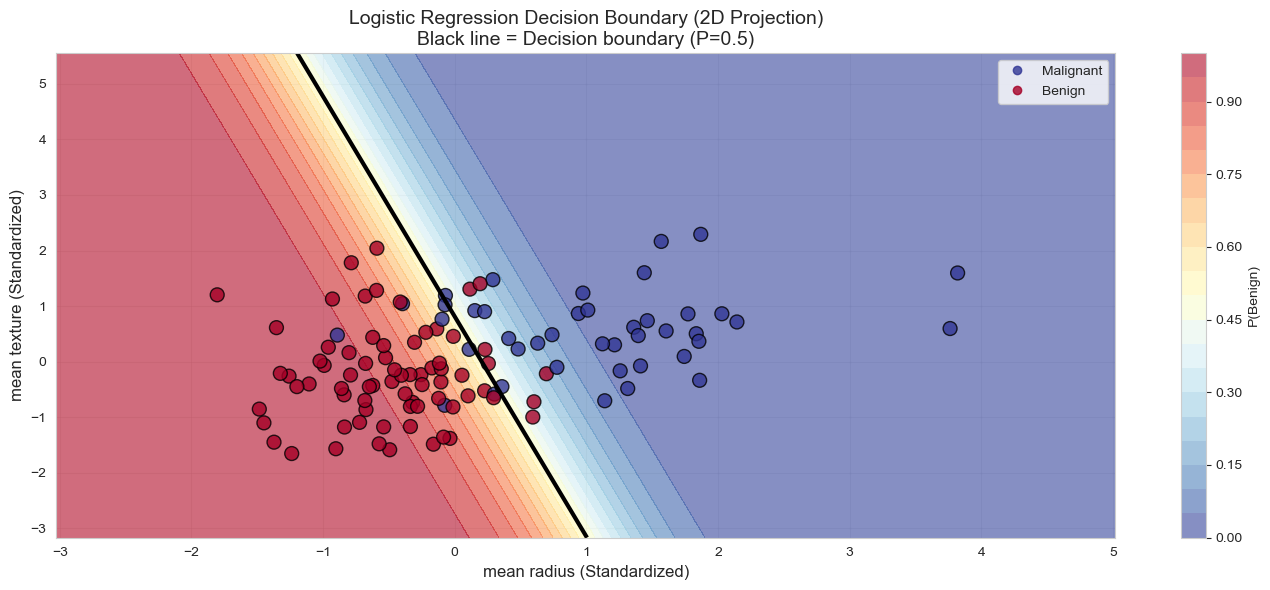

📊 2D Model Performance:
Accuracy: 0.8772
(Note: Full model with all features performs better!)


In [35]:
# Plot decision boundary
plt.figure(figsize=(14, 6))

# Contour plot
plt.contourf(xx, yy, Z, levels=20, cmap='RdYlBu_r', alpha=0.6)
plt.colorbar(label='P(Benign)')

# Decision boundary
plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=3)

# Scatter plot
scatter = plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], 
                     c=y_test_c, cmap='RdYlBu_r', 
                     edgecolors='black', s=100, alpha=0.8)

plt.xlabel(f'{cancer.feature_names[0]} (Standardized)', fontsize=12)
plt.ylabel(f'{cancer.feature_names[1]} (Standardized)', fontsize=12)
plt.title('Logistic Regression Decision Boundary (2D Projection)\nBlack line = Decision boundary (P=0.5)', fontsize=14)
plt.legend(handles=scatter.legend_elements()[0], labels=['Malignant', 'Benign'])
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("📊 2D Model Performance:")
print(f"Accuracy: {log_reg_2d.score(X_test_2d, y_test_c):.4f}")
print("(Note: Full model with all features performs better!)")

## 📊 Section 4: Evaluation Metrics Deep Dive

### 4.1 Confusion Matrix

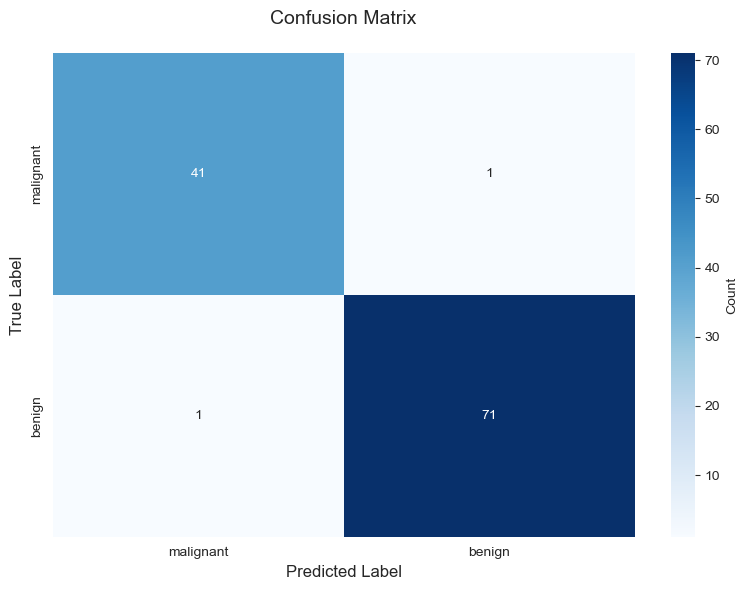

📊 Confusion Matrix Breakdown:
True Negatives (TN):  41 (Correctly predicted Malignant)
False Positives (FP): 1 (Predicted Benign, actually Malignant) - Type I Error
False Negatives (FN): 1 (Predicted Malignant, actually Benign) - Type II Error
True Positives (TP):  71 (Correctly predicted Benign)

📈 Derived Metrics:
Accuracy:  0.9825 = (TP + TN) / Total
Precision: 0.9861 = TP / (TP + FP)
Recall:    0.9861 = TP / (TP + FN)
F1 Score:  0.9861 = 2 × (Prec × Rec) / (Prec + Rec)


In [41]:
# Compute confusion matrix
cm = confusion_matrix(y_test_c, y_pred_c)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=cancer.target_names, 
            yticklabels=cancer.target_names,
            cbar_kws={'label': 'Count'})
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix\n', fontsize=14)
plt.tight_layout()
plt.show()

# Calculate metrics from confusion matrix
tn, fp, fn, tp = cm.ravel()

print("📊 Confusion Matrix Breakdown:")
print("="*70)
print(f"True Negatives (TN):  {tn} (Correctly predicted Malignant)")
print(f"False Positives (FP): {fp} (Predicted Benign, actually Malignant) - Type I Error")
print(f"False Negatives (FN): {fn} (Predicted Malignant, actually Benign) - Type II Error")
print(f"True Positives (TP):  {tp} (Correctly predicted Benign)")

print(f"\n📈 Derived Metrics:")
print(f"Accuracy:  {(tp + tn) / (tp + tn + fp + fn):.4f} = (TP + TN) / Total")
print(f"Precision: {tp / (tp + fp):.4f} = TP / (TP + FP)")
print(f"Recall:    {tp / (tp + fn):.4f} = TP / (TP + FN)")
print(f"F1 Score:  {2 * (precision_c * recall_c) / (precision_c + recall_c):.4f} = 2 × (Prec × Rec) / (Prec + Rec)")

### 4.2 Classification Report

In [44]:
# Detailed classification report
print("\n📊 Detailed Classification Report:")
print("="*70)
print(classification_report(y_test_c, y_pred_c, target_names=cancer.target_names))

print("\n💡 Interpretation:")
print("  • Precision: When we predict a class, how often are we right?")
print("  • Recall: Of all actual instances of a class, how many did we find?")
print("  • F1-Score: Balance between Precision and Recall")
print("  • Support: Number of actual occurrences of each class")


📊 Detailed Classification Report:
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        42
      benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


💡 Interpretation:
  • Precision: When we predict a class, how often are we right?
  • Recall: Of all actual instances of a class, how many did we find?
  • F1-Score: Balance between Precision and Recall
  • Support: Number of actual occurrences of each class


### 4.3 ROC Curve & AUC

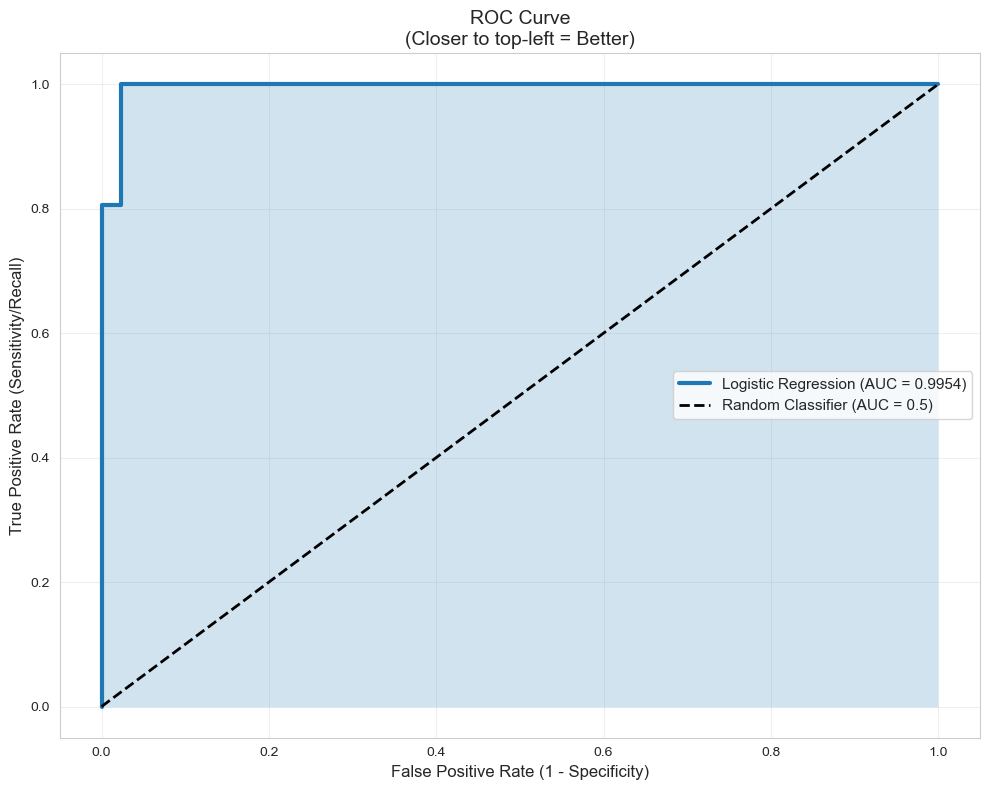


📊 ROC-AUC Score: 0.9954

💡 AUC Interpretation:
  • 1.0: Perfect classifier
  • 0.9-1.0: Excellent
  • 0.8-0.9: Good
  • 0.7-0.8: Fair
  • 0.5-0.7: Poor
  • 0.5: Random guessing


In [47]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test_c, y_pred_proba_c[:, 1])
roc_auc = roc_auc_score(y_test_c, y_pred_proba_c[:, 1])

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, linewidth=3, label=f'Logistic Regression (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier (AUC = 0.5)')
plt.fill_between(fpr, tpr, alpha=0.2)

plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12)
plt.ylabel('True Positive Rate (Sensitivity/Recall)', fontsize=12)
plt.title('ROC Curve\n(Closer to top-left = Better)', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n📊 ROC-AUC Score: {roc_auc:.4f}")
print("\n💡 AUC Interpretation:")
print("  • 1.0: Perfect classifier")
print("  • 0.9-1.0: Excellent")
print("  • 0.8-0.9: Good")
print("  • 0.7-0.8: Fair")
print("  • 0.5-0.7: Poor")
print("  • 0.5: Random guessing")

### 4.4 Precision-Recall Curve

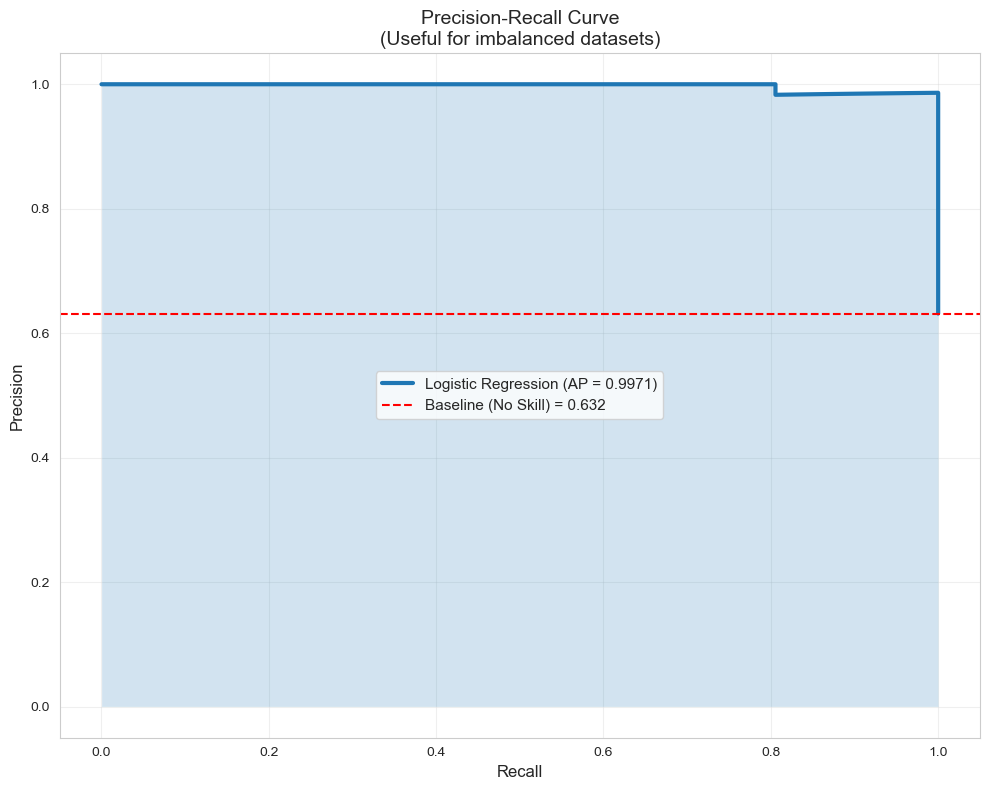


📊 Average Precision Score: 0.9971


In [50]:
# Compute Precision-Recall curve
precision_vals, recall_vals, pr_thresholds = precision_recall_curve(y_test_c, y_pred_proba_c[:, 1])
avg_precision = average_precision_score(y_test_c, y_pred_proba_c[:, 1])

# Plot Precision-Recall curve
plt.figure(figsize=(10, 8))
plt.plot(recall_vals, precision_vals, linewidth=3, 
         label=f'Logistic Regression (AP = {avg_precision:.4f})')
plt.axhline(y=y_test_c.mean(), color='r', linestyle='--', 
            label=f'Baseline (No Skill) = {y_test_c.mean():.3f}')
plt.fill_between(recall_vals, precision_vals, alpha=0.2)

plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Precision-Recall Curve\n(Useful for imbalanced datasets)', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n📊 Average Precision Score: {avg_precision:.4f}")

### 4.5 Threshold Tuning

In [53]:
# Analyze different thresholds
thresholds_to_test = np.linspace(0.1, 0.9, 17)
threshold_metrics = []

for threshold in thresholds_to_test:
    y_pred_threshold = (y_pred_proba_c[:, 1] >= threshold).astype(int)
    
    acc = accuracy_score(y_test_c, y_pred_threshold)
    prec = precision_score(y_test_c, y_pred_threshold, zero_division=0)
    rec = recall_score(y_test_c, y_pred_threshold, zero_division=0)
    f1 = f1_score(y_test_c, y_pred_threshold, zero_division=0)
    
    threshold_metrics.append({
        'Threshold': threshold,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1': f1
    })

threshold_df = pd.DataFrame(threshold_metrics)

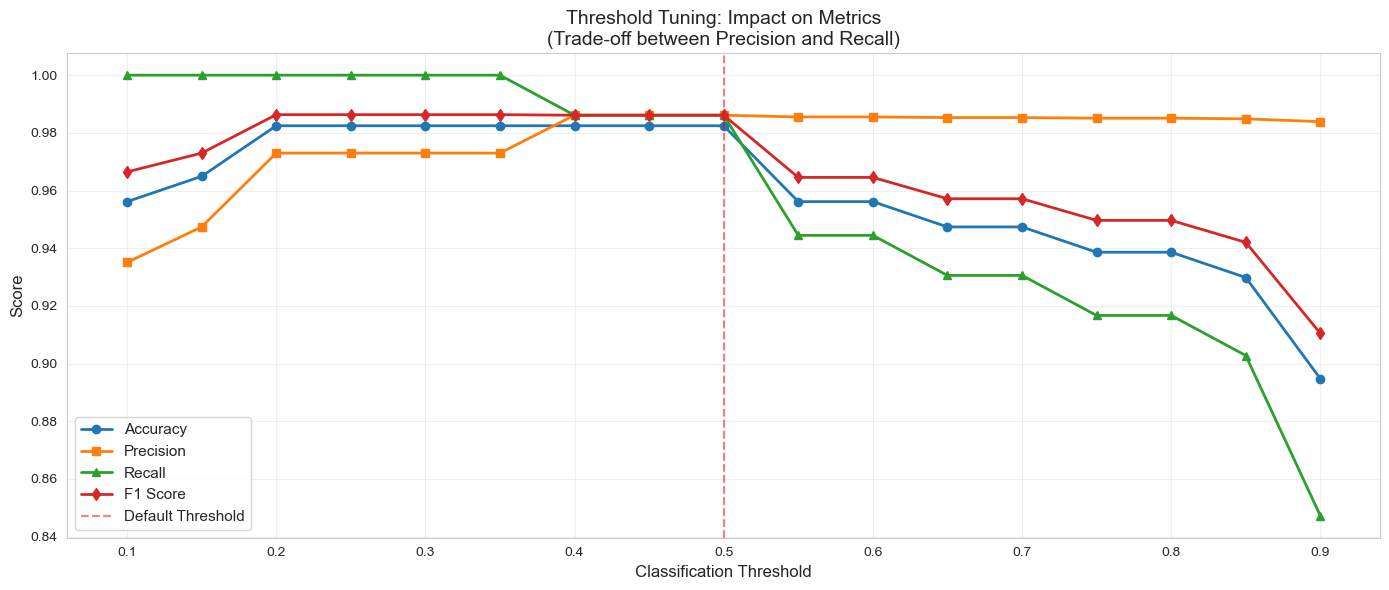


💡 Threshold Selection Strategy:
  • Lower threshold → Higher Recall, Lower Precision (catch more positives)
  • Higher threshold → Higher Precision, Lower Recall (more confident)
  • Default 0.5 → Balanced approach
  • Medical diagnosis → Prefer high Recall (don't miss cancer)
  • Spam detection → Prefer high Precision (don't block real emails)


In [55]:
# Plot threshold vs metrics
plt.figure(figsize=(14, 6))

plt.plot(threshold_df['Threshold'], threshold_df['Accuracy'], 
         marker='o', linewidth=2, label='Accuracy')
plt.plot(threshold_df['Threshold'], threshold_df['Precision'], 
         marker='s', linewidth=2, label='Precision')
plt.plot(threshold_df['Threshold'], threshold_df['Recall'], 
         marker='^', linewidth=2, label='Recall')
plt.plot(threshold_df['Threshold'], threshold_df['F1'], 
         marker='d', linewidth=2, label='F1 Score')

plt.axvline(x=0.5, color='red', linestyle='--', alpha=0.5, label='Default Threshold')
plt.xlabel('Classification Threshold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Threshold Tuning: Impact on Metrics\n(Trade-off between Precision and Recall)', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n💡 Threshold Selection Strategy:")
print("  • Lower threshold → Higher Recall, Lower Precision (catch more positives)")
print("  • Higher threshold → Higher Precision, Lower Recall (more confident)")
print("  • Default 0.5 → Balanced approach")
print("  • Medical diagnosis → Prefer high Recall (don't miss cancer)")
print("  • Spam detection → Prefer high Precision (don't block real emails)")

## 🎨 Section 5: Multi-Class Classification

### 5.1 One-vs-Rest (OvR) Strategy

In [59]:
# Train multi-class logistic regression (OvR - default)
log_reg_ovr = LogisticRegression(multi_class='ovr', random_state=42, max_iter=10000)
log_reg_ovr.fit(X_train_w_scaled, y_train_w)

# Predictions
y_pred_w_ovr = log_reg_ovr.predict(X_test_w_scaled)
y_pred_proba_w_ovr = log_reg_ovr.predict_proba(X_test_w_scaled)

# Evaluate
accuracy_w_ovr = accuracy_score(y_test_w, y_pred_w_ovr)

print("📊 Multi-Class Logistic Regression (One-vs-Rest):")
print(f"Accuracy: {accuracy_w_ovr:.4f}")
print(f"\nNumber of binary classifiers trained: {len(log_reg_ovr.classes_)}")
print(f"Classes: {wine.target_names.tolist()}")

📊 Multi-Class Logistic Regression (One-vs-Rest):
Accuracy: 1.0000

Number of binary classifiers trained: 3
Classes: ['class_0', 'class_1', 'class_2']


### 5.2 Multinomial (Softmax) Strategy

In [62]:
# Train multi-class logistic regression (Multinomial)
log_reg_multi = LogisticRegression(multi_class='multinomial', random_state=42, max_iter=10000)
log_reg_multi.fit(X_train_w_scaled, y_train_w)

# Predictions
y_pred_w_multi = log_reg_multi.predict(X_test_w_scaled)
y_pred_proba_w_multi = log_reg_multi.predict_proba(X_test_w_scaled)

# Evaluate
accuracy_w_multi = accuracy_score(y_test_w, y_pred_w_multi)

print("📊 Multi-Class Logistic Regression (Multinomial/Softmax):")
print(f"Accuracy: {accuracy_w_multi:.4f}")

print("\n🔍 Comparing Strategies:")
print(f"One-vs-Rest:  {accuracy_w_ovr:.4f}")
print(f"Multinomial:  {accuracy_w_multi:.4f}")
print(f"Difference:   {abs(accuracy_w_ovr - accuracy_w_multi):.4f}")

📊 Multi-Class Logistic Regression (Multinomial/Softmax):
Accuracy: 0.9722

🔍 Comparing Strategies:
One-vs-Rest:  1.0000
Multinomial:  0.9722
Difference:   0.0278


### 5.3 Multi-Class Confusion Matrix

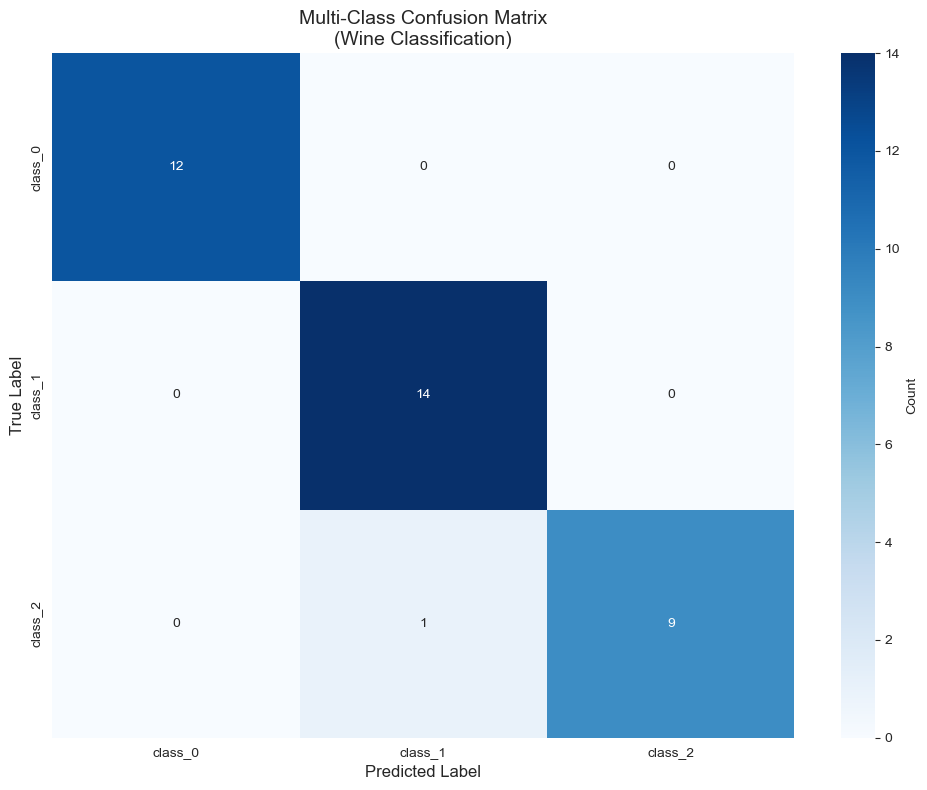

In [65]:
# Compute confusion matrix for multi-class
cm_multi = confusion_matrix(y_test_w, y_pred_w_multi)

# Visualize
plt.figure(figsize=(10, 8))
sns.heatmap(cm_multi, annot=True, fmt='d', cmap='Blues',
            xticklabels=wine.target_names,
            yticklabels=wine.target_names,
            cbar_kws={'label': 'Count'})
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Multi-Class Confusion Matrix\n(Wine Classification)', fontsize=14)
plt.tight_layout()
plt.show()

### 5.4 Multi-Class Classification Report

In [68]:
# Detailed report
print("\n📊 Multi-Class Classification Report:")
print("="*70)
print(classification_report(y_test_w, y_pred_w_multi, target_names=wine.target_names))


📊 Multi-Class Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       0.93      1.00      0.97        14
     class_2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



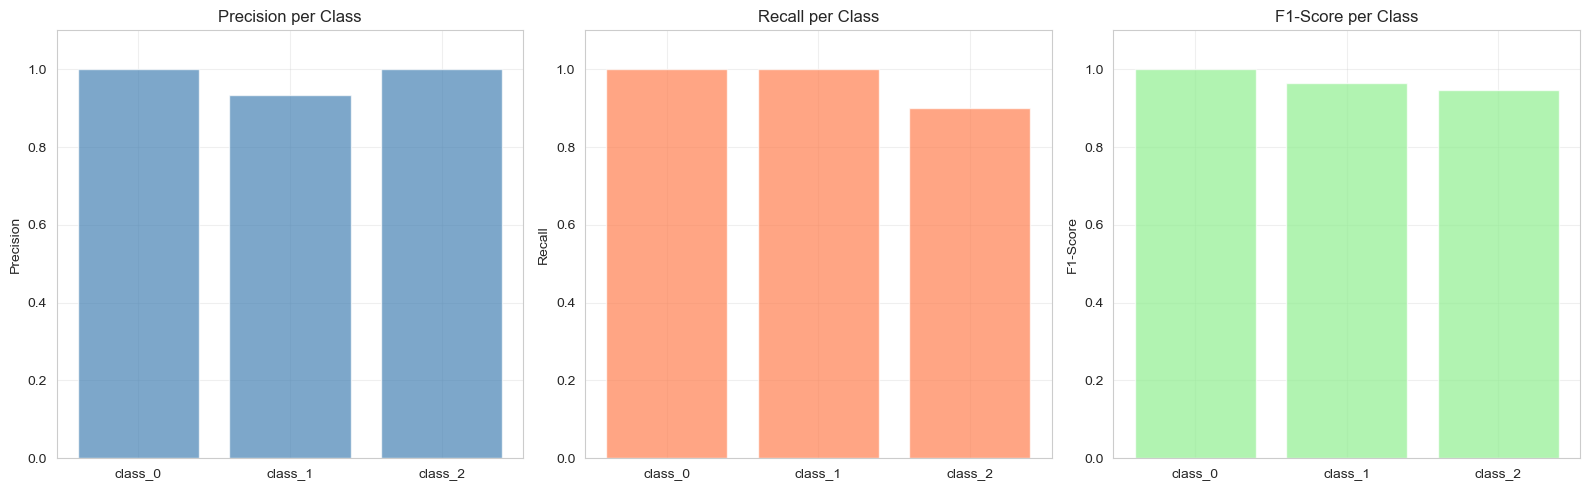

In [70]:
# Visualize per-class metrics
report = classification_report(y_test_w, y_pred_w_multi, target_names=wine.target_names, output_dict=True)

metrics_df = pd.DataFrame({
    'Class': wine.target_names,
    'Precision': [report[cls]['precision'] for cls in wine.target_names],
    'Recall': [report[cls]['recall'] for cls in wine.target_names],
    'F1-Score': [report[cls]['f1-score'] for cls in wine.target_names],
    'Support': [report[cls]['support'] for cls in wine.target_names]
})

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Precision
axes[0].bar(metrics_df['Class'], metrics_df['Precision'], alpha=0.7, color='steelblue')
axes[0].set_ylabel('Precision')
axes[0].set_title('Precision per Class')
axes[0].set_ylim([0, 1.1])
axes[0].grid(True, alpha=0.3)

# Recall
axes[1].bar(metrics_df['Class'], metrics_df['Recall'], alpha=0.7, color='coral')
axes[1].set_ylabel('Recall')
axes[1].set_title('Recall per Class')
axes[1].set_ylim([0, 1.1])
axes[1].grid(True, alpha=0.3)

# F1-Score
axes[2].bar(metrics_df['Class'], metrics_df['F1-Score'], alpha=0.7, color='lightgreen')
axes[2].set_ylabel('F1-Score')
axes[2].set_title('F1-Score per Class')
axes[2].set_ylim([0, 1.1])
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 5.5 Multi-Class Probability Predictions

In [75]:
# Show probability predictions for a few samples
print("\n🔍 Sample Multi-Class Predictions with Probabilities:")
print("="*70)

for idx in range(5):
    actual = y_test_w.iloc[idx]
    pred = y_pred_w_multi[idx]
    probs = y_pred_proba_w_multi[idx]
    
    print(f"\nSample {idx}:")
    print(f"  Actual: {wine.target_names[actual]}")
    print(f"  Predicted: {wine.target_names[pred]}")
    print(f"  Probabilities:")
    for i, class_name in enumerate(wine.target_names):
        print(f"    {class_name:15}: {probs[i]:.2%}")
    print(f"  {'✅ Correct' if actual == pred else '❌ Wrong'}")


🔍 Sample Multi-Class Predictions with Probabilities:

Sample 0:
  Actual: class_0
  Predicted: class_0
  Probabilities:
    class_0        : 99.97%
    class_1        : 0.03%
    class_2        : 0.00%
  ✅ Correct

Sample 1:
  Actual: class_2
  Predicted: class_1
  Probabilities:
    class_0        : 0.71%
    class_1        : 54.04%
    class_2        : 45.25%
  ❌ Wrong

Sample 2:
  Actual: class_0
  Predicted: class_0
  Probabilities:
    class_0        : 99.20%
    class_1        : 0.77%
    class_2        : 0.03%
  ✅ Correct

Sample 3:
  Actual: class_1
  Predicted: class_1
  Probabilities:
    class_0        : 29.00%
    class_1        : 70.75%
    class_2        : 0.26%
  ✅ Correct

Sample 4:
  Actual: class_1
  Predicted: class_1
  Probabilities:
    class_0        : 3.30%
    class_1        : 96.23%
    class_2        : 0.47%
  ✅ Correct


## 🚀 Section 6: Regularization & Hyperparameter Tuning

### 6.1 Impact of Regularization (C Parameter)

In [80]:
# Test different C values (inverse of regularization strength)
C_values = np.logspace(-3, 3, 20)
train_scores = []
test_scores = []

print("🔍 Testing different C values (regularization strength)...")

for C in C_values:
    log_reg_temp = LogisticRegression(C=C, random_state=42, max_iter=10000)
    log_reg_temp.fit(X_train_c_scaled, y_train_c)
    
    train_scores.append(log_reg_temp.score(X_train_c_scaled, y_train_c))
    test_scores.append(log_reg_temp.score(X_test_c_scaled, y_test_c))

🔍 Testing different C values (regularization strength)...


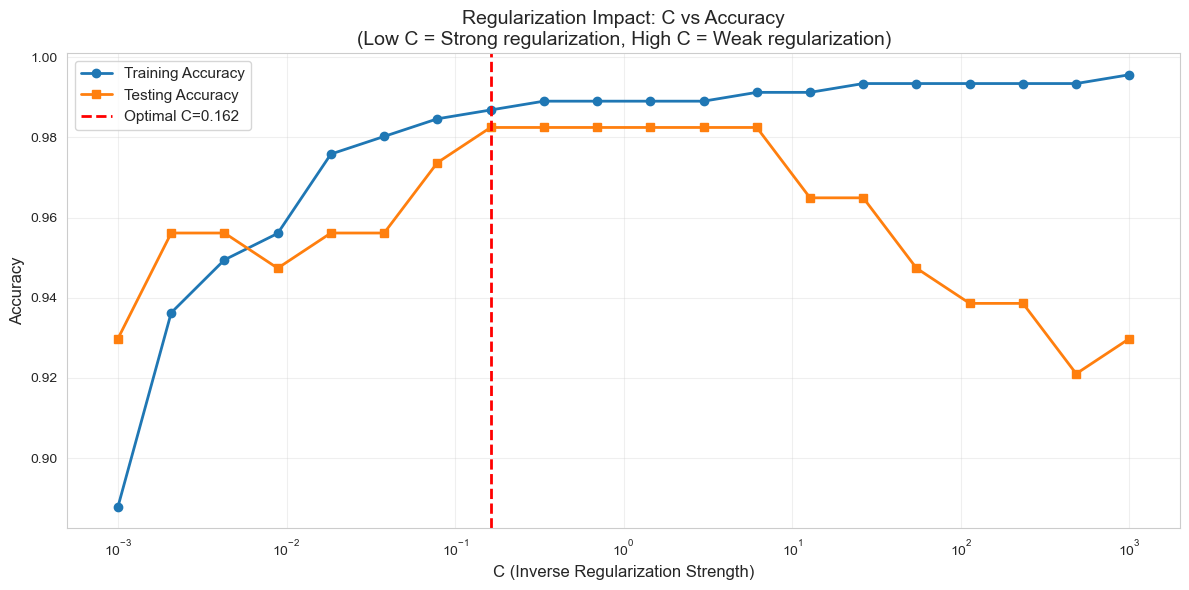


📊 Optimal C: 0.1624
Best Test Accuracy: 0.9825


In [82]:
# Plot C vs Accuracy
plt.figure(figsize=(12, 6))

plt.plot(C_values, train_scores, label='Training Accuracy', marker='o', linewidth=2)
plt.plot(C_values, test_scores, label='Testing Accuracy', marker='s', linewidth=2)

optimal_C = C_values[np.argmax(test_scores)]
plt.axvline(x=optimal_C, color='red', linestyle='--', 
            label=f'Optimal C={optimal_C:.3f}', linewidth=2)

plt.xscale('log')
plt.xlabel('C (Inverse Regularization Strength)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Regularization Impact: C vs Accuracy\n(Low C = Strong regularization, High C = Weak regularization)', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n📊 Optimal C: {optimal_C:.4f}")
print(f"Best Test Accuracy: {max(test_scores):.4f}")

### 6.2 L1 vs L2 Regularization

In [85]:
# Compare L1 (Lasso) vs L2 (Ridge) regularization
penalties = ['l1', 'l2', 'elasticnet']
penalty_results = []

print("\n🔍 Comparing Regularization Types:")
print("="*70)

for penalty in penalties:
    if penalty == 'elasticnet':
        log_reg = LogisticRegression(penalty=penalty, solver='saga', l1_ratio=0.5,
                                     C=1.0, random_state=42, max_iter=10000)
    else:
        solver = 'liblinear' if penalty == 'l1' else 'lbfgs'
        log_reg = LogisticRegression(penalty=penalty, solver=solver, C=1.0,
                                     random_state=42, max_iter=10000)
    
    log_reg.fit(X_train_c_scaled, y_train_c)
    
    accuracy = log_reg.score(X_test_c_scaled, y_test_c)
    n_zero_coefs = np.sum(log_reg.coef_[0] == 0)
    
    penalty_results.append({
        'Penalty': penalty.upper(),
        'Accuracy': accuracy,
        'Zero Coefficients': n_zero_coefs,
        'Non-zero Coefficients': len(log_reg.coef_[0]) - n_zero_coefs
    })
    
    print(f"{penalty.upper():12} → Accuracy: {accuracy:.4f} | Zero coefs: {n_zero_coefs}/{len(log_reg.coef_[0])}")

penalty_df = pd.DataFrame(penalty_results)


🔍 Comparing Regularization Types:
L1           → Accuracy: 0.9912 | Zero coefs: 14/30
L2           → Accuracy: 0.9825 | Zero coefs: 0/30
ELASTICNET   → Accuracy: 0.9825 | Zero coefs: 3/30


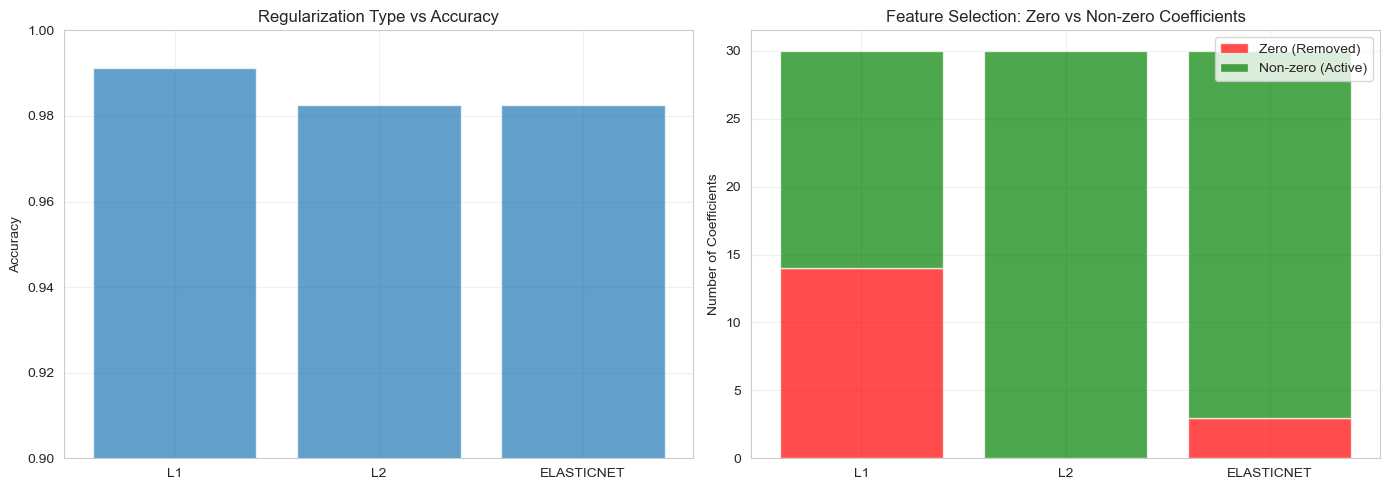

In [87]:
# Visualize regularization comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy
axes[0].bar(penalty_df['Penalty'], penalty_df['Accuracy'], alpha=0.7)
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Regularization Type vs Accuracy')
axes[0].set_ylim([0.9, 1.0])
axes[0].grid(True, alpha=0.3)

# Feature Selection
axes[1].bar(penalty_df['Penalty'], penalty_df['Zero Coefficients'], 
            alpha=0.7, color='red', label='Zero (Removed)')
axes[1].bar(penalty_df['Penalty'], penalty_df['Non-zero Coefficients'], 
            bottom=penalty_df['Zero Coefficients'],
            alpha=0.7, color='green', label='Non-zero (Active)')
axes[1].set_ylabel('Number of Coefficients')
axes[1].set_title('Feature Selection: Zero vs Non-zero Coefficients')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 6.3 Grid Search for Optimal Hyperparameters

In [90]:
# Comprehensive grid search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # Supports both L1 and L2
}

print("🔍 Starting Grid Search...")
print("Testing 6 × 2 = 12 combinations with 5-fold CV")

grid_search = GridSearchCV(
    LogisticRegression(random_state=42, max_iter=10000),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_c_scaled, y_train_c)

print("\n✅ Grid Search Complete!")
print("\n🎯 Best Hyperparameters:")
for param, value in grid_search.best_params_.items():
    print(f"  {param:10}: {value}")
print(f"\nBest Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

🔍 Starting Grid Search...
Testing 6 × 2 = 12 combinations with 5-fold CV
Fitting 5 folds for each of 12 candidates, totalling 60 fits

✅ Grid Search Complete!

🎯 Best Hyperparameters:
  C         : 1
  penalty   : l2
  solver    : liblinear

Best Cross-Validation Accuracy: 0.9802


In [92]:
# Evaluate best model
best_log_reg = grid_search.best_estimator_
y_pred_best = best_log_reg.predict(X_test_c_scaled)

best_accuracy = accuracy_score(y_test_c, y_pred_best)
best_f1 = f1_score(y_test_c, y_pred_best)

print("\n📊 Best Model Performance on Test Set:")
print(f"Accuracy: {best_accuracy:.4f}")
print(f"F1 Score: {best_f1:.4f}")


📊 Best Model Performance on Test Set:
Accuracy: 0.9825
F1 Score: 0.9861


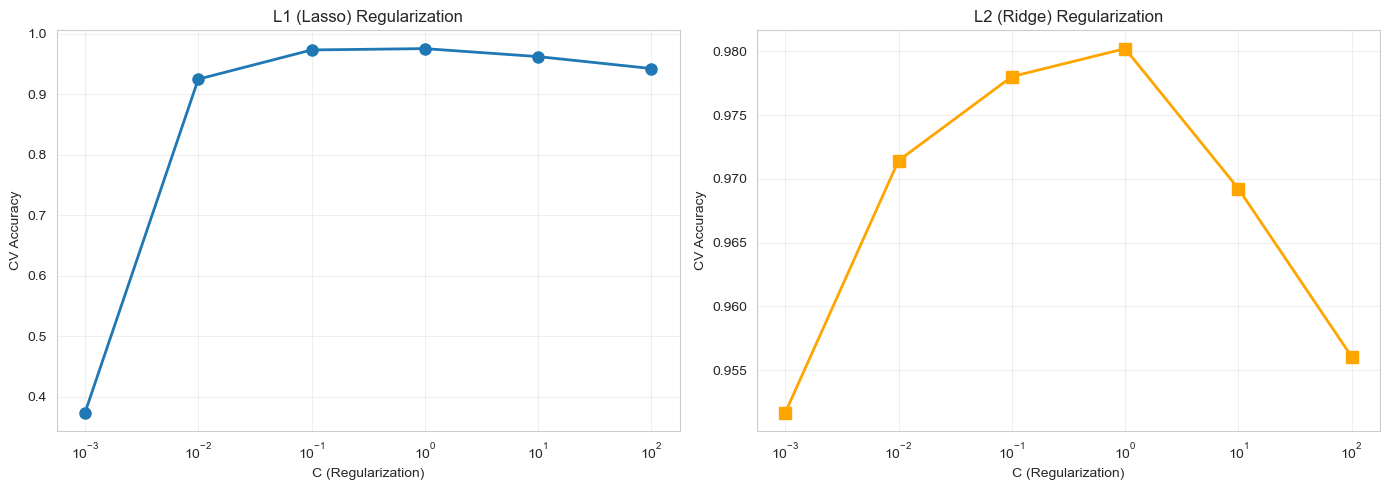

In [94]:
# Visualize grid search results
results_df = pd.DataFrame(grid_search.cv_results_)

# Create pivot table for heatmap
pivot_l1 = results_df[results_df['param_penalty'] == 'l1'].pivot_table(
    values='mean_test_score',
    index='param_C',
    aggfunc='mean'
).sort_index()

pivot_l2 = results_df[results_df['param_penalty'] == 'l2'].pivot_table(
    values='mean_test_score',
    index='param_C',
    aggfunc='mean'
).sort_index()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# L1
axes[0].plot(pivot_l1.index, pivot_l1.values, marker='o', linewidth=2, markersize=8)
axes[0].set_xscale('log')
axes[0].set_xlabel('C (Regularization)')
axes[0].set_ylabel('CV Accuracy')
axes[0].set_title('L1 (Lasso) Regularization')
axes[0].grid(True, alpha=0.3)

# L2
axes[1].plot(pivot_l2.index, pivot_l2.values, marker='s', linewidth=2, markersize=8, color='orange')
axes[1].set_xscale('log')
axes[1].set_xlabel('C (Regularization)')
axes[1].set_ylabel('CV Accuracy')
axes[1].set_title('L2 (Ridge) Regularization')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 🚀 Section 7: Production Best Practices

### 7.1 Production-Ready Pipeline

In [98]:
# Build complete pipeline
production_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(
        C=grid_search.best_params_['C'],
        penalty=grid_search.best_params_['penalty'],
        solver=grid_search.best_params_['solver'],
        random_state=42,
        max_iter=10000
    ))
])

# Train pipeline
production_pipeline.fit(X_train_c, y_train_c)

# Evaluate
y_pred_pipeline = production_pipeline.predict(X_test_c)
pipeline_accuracy = accuracy_score(y_test_c, y_pred_pipeline)

print("🚀 Production Pipeline Performance:")
print(f"Accuracy: {pipeline_accuracy:.4f}")

🚀 Production Pipeline Performance:
Accuracy: 0.9825


In [100]:
# Save pipeline
import joblib

joblib.dump(production_pipeline, 'logistic_regression_pipeline.pkl')
print("\n💾 Pipeline saved as 'logistic_regression_pipeline.pkl'")

# Test loading
loaded_pipeline = joblib.load('logistic_regression_pipeline.pkl')
test_pred = loaded_pipeline.predict(X_test_c[:3])
test_proba = loaded_pipeline.predict_proba(X_test_c[:3])

print("\n🧪 Testing Loaded Pipeline:")
print(f"Predictions: {test_pred}")
print(f"Actual:      {y_test_c[:3].values}")
print(f"Probabilities:\n{test_proba}")
print("✅ Pipeline works correctly!")


💾 Pipeline saved as 'logistic_regression_pipeline.pkl'

🧪 Testing Loaded Pipeline:
Predictions: [0 1 0]
Actual:      [0 1 0]
Probabilities:
[[9.99999947e-01 5.30434015e-08]
 [1.19527206e-05 9.99988047e-01]
 [9.93997209e-01 6.00279146e-03]]
✅ Pipeline works correctly!


### 7.2 Feature Importance Analysis

In [104]:
# Analyze feature importance from coefficients
feature_importance = pd.DataFrame({
    'Feature': X_train_c.columns,
    'Coefficient': best_log_reg.coef_[0],
    'Abs_Coefficient': np.abs(best_log_reg.coef_[0])
}).sort_values('Abs_Coefficient', ascending=False)

print("\n🔍 Feature Importance (Top 10):")
print(feature_importance.head(10).to_string(index=False))


🔍 Feature Importance (Top 10):
             Feature  Coefficient  Abs_Coefficient
       worst texture    -1.242272         1.242272
        radius error    -1.087929         1.087929
          worst area    -0.979282         0.979282
          area error    -0.958096         0.958096
        worst radius    -0.946000         0.946000
worst concave points    -0.945296         0.945296
      worst symmetry    -0.928729         0.928729
     worst concavity    -0.827180         0.827180
     worst perimeter    -0.764807         0.764807
    worst smoothness    -0.759567         0.759567


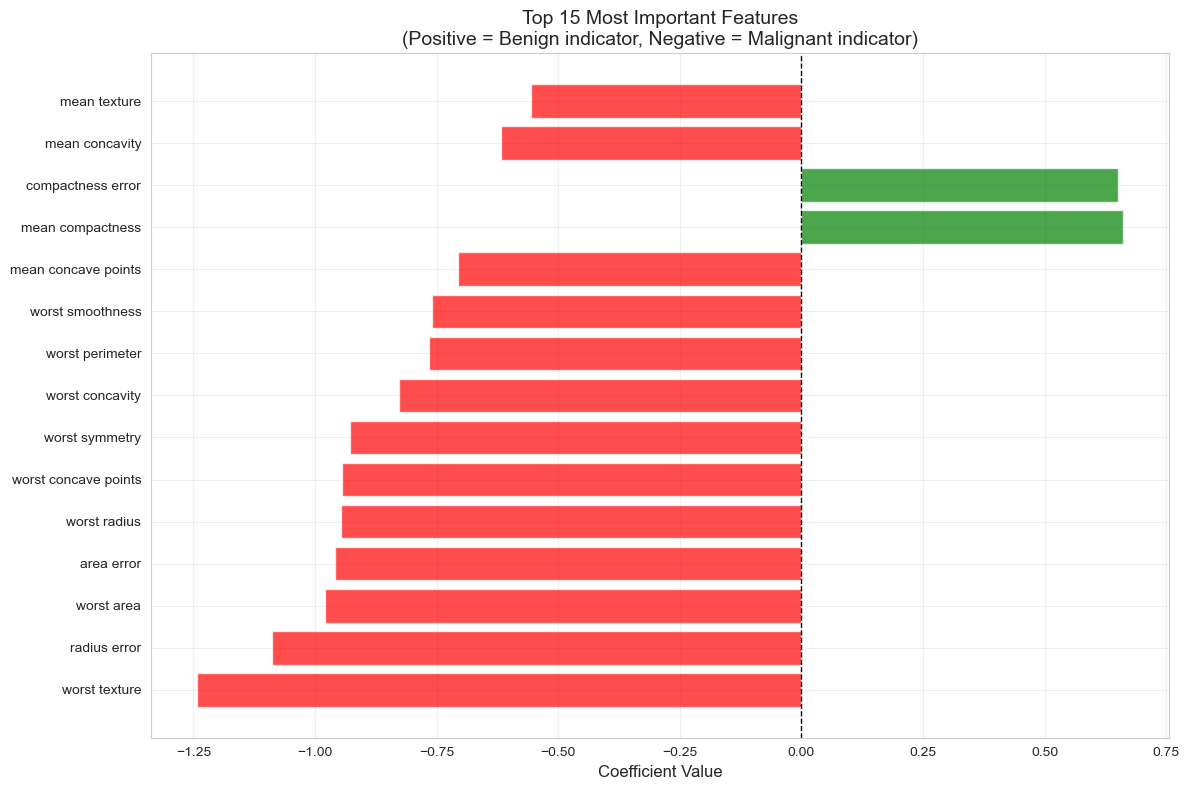


💡 Coefficient Interpretation:
  • Positive coefficient → Increases probability of Benign (Class 1)
  • Negative coefficient → Increases probability of Malignant (Class 0)
  • Larger magnitude → Stronger influence


In [106]:
# Visualize feature importance
plt.figure(figsize=(12, 8))

top_features = feature_importance.head(15)
colors = ['green' if x > 0 else 'red' for x in top_features['Coefficient']]

plt.barh(range(len(top_features)), top_features['Coefficient'], color=colors, alpha=0.7)
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Coefficient Value', fontsize=12)
plt.title('Top 15 Most Important Features\n(Positive = Benign indicator, Negative = Malignant indicator)', fontsize=14)
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n💡 Coefficient Interpretation:")
print("  • Positive coefficient → Increases probability of Benign (Class 1)")
print("  • Negative coefficient → Increases probability of Malignant (Class 0)")
print("  • Larger magnitude → Stronger influence")

### 7.3 Learning Curves

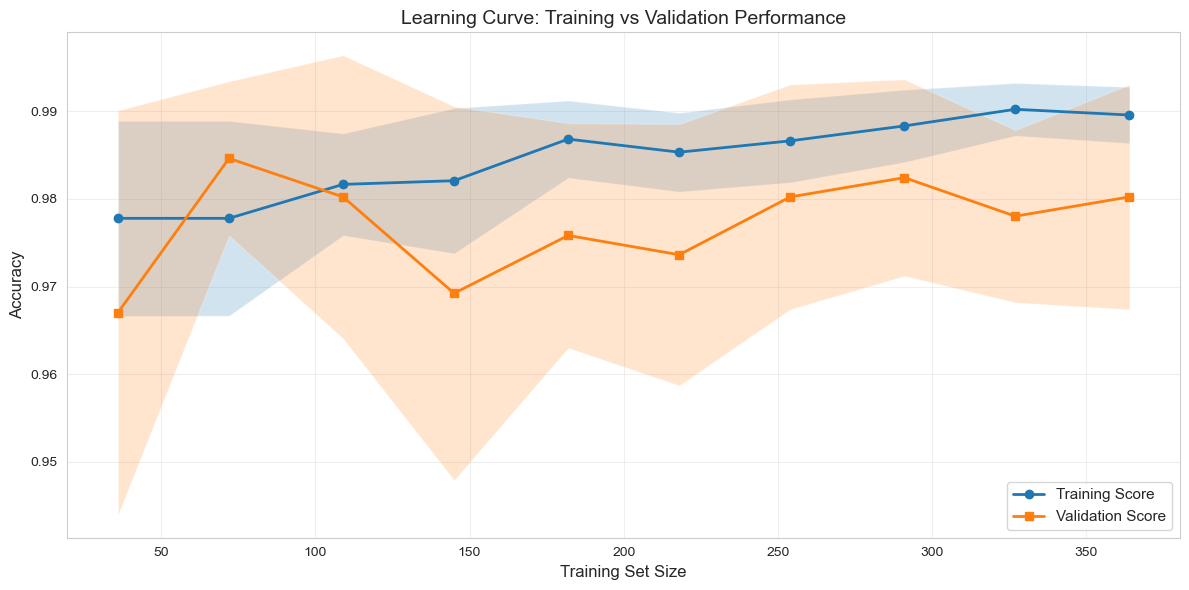


📈 Learning Curve Analysis:
Training Score (full data):   0.9896
Validation Score (full data): 0.9802
Gap: 0.0093
✅ Small gap indicates good generalization!


In [109]:
# Generate learning curves
train_sizes, train_scores, val_scores = learning_curve(
    best_log_reg,
    X_train_c_scaled,
    y_train_c,
    cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy',
    n_jobs=-1
)

train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
val_mean = val_scores.mean(axis=1)
val_std = val_scores.std(axis=1)

plt.figure(figsize=(12, 6))
plt.plot(train_sizes, train_mean, label='Training Score', marker='o', linewidth=2)
plt.plot(train_sizes, val_mean, label='Validation Score', marker='s', linewidth=2)
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2)
plt.xlabel('Training Set Size', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Learning Curve: Training vs Validation Performance', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n📈 Learning Curve Analysis:")
print(f"Training Score (full data):   {train_mean[-1]:.4f}")
print(f"Validation Score (full data): {val_mean[-1]:.4f}")
print(f"Gap: {train_mean[-1] - val_mean[-1]:.4f}")

if train_mean[-1] - val_mean[-1] < 0.05:
    print("✅ Small gap indicates good generalization!")
else:
    print("⚠️  Large gap suggests some overfitting")

### 7.4 Cross-Validation Analysis

In [112]:
# Detailed cross-validation
cv_scores = cross_val_score(
    best_log_reg,
    X_train_c_scaled,
    y_train_c,
    cv=10,
    scoring='accuracy'
)

print("\n🔄 10-Fold Cross-Validation Results:")
print("="*70)
print(f"CV Scores: {cv_scores}")
print(f"\nMean Accuracy: {cv_scores.mean():.4f}")
print(f"Std Dev:       {cv_scores.std():.4f}")
print(f"Min:           {cv_scores.min():.4f}")
print(f"Max:           {cv_scores.max():.4f}")


🔄 10-Fold Cross-Validation Results:
CV Scores: [0.93478261 1.         1.         0.97826087 0.93478261 1.
 1.         1.         1.         0.97777778]

Mean Accuracy: 0.9826
Std Dev:       0.0254
Min:           0.9348
Max:           1.0000


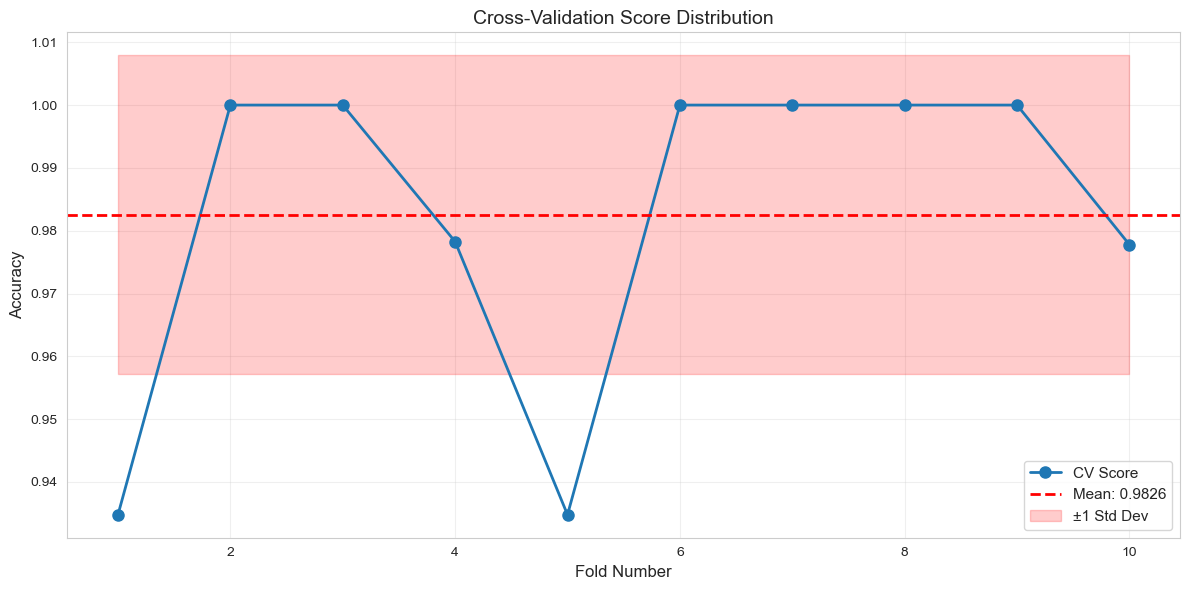

In [114]:
# Visualize CV scores
plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), cv_scores, marker='o', linestyle='-', 
         linewidth=2, markersize=8, label='CV Score')
plt.axhline(y=cv_scores.mean(), color='r', linestyle='--', 
            label=f'Mean: {cv_scores.mean():.4f}', linewidth=2)
plt.fill_between(range(1, 11), 
                 cv_scores.mean() - cv_scores.std(),
                 cv_scores.mean() + cv_scores.std(),
                 alpha=0.2, color='red', label='±1 Std Dev')
plt.xlabel('Fold Number', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Cross-Validation Score Distribution', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 7.5 Model Comparison Summary

In [117]:
# Final comprehensive comparison
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Train other classifiers for comparison
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_c_scaled, y_train_c)

rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train_c_scaled, y_train_c)

# Create comparison
models_comparison = pd.DataFrame({
    'Model': [
        'Logistic Regression (Default)',
        'Logistic Regression (Tuned)',
        'Decision Tree',
        'Random Forest'
    ],
    'Accuracy': [
        accuracy_c,
        best_accuracy,
        dt.score(X_test_c_scaled, y_test_c),
        rf.score(X_test_c_scaled, y_test_c)
    ],
    'Interpretability': [
        'High',
        'High',
        'High',
        'Medium'
    ],
    'Training Speed': [
        'Fast',
        'Fast',
        'Fast',
        'Medium'
    ]
})

print("\n📊 MODEL COMPARISON:")
print("="*70)
print(models_comparison.to_string(index=False))


📊 MODEL COMPARISON:
                        Model  Accuracy Interpretability Training Speed
Logistic Regression (Default)  0.982456             High           Fast
  Logistic Regression (Tuned)  0.982456             High           Fast
                Decision Tree  0.912281             High           Fast
                Random Forest  0.956140           Medium         Medium


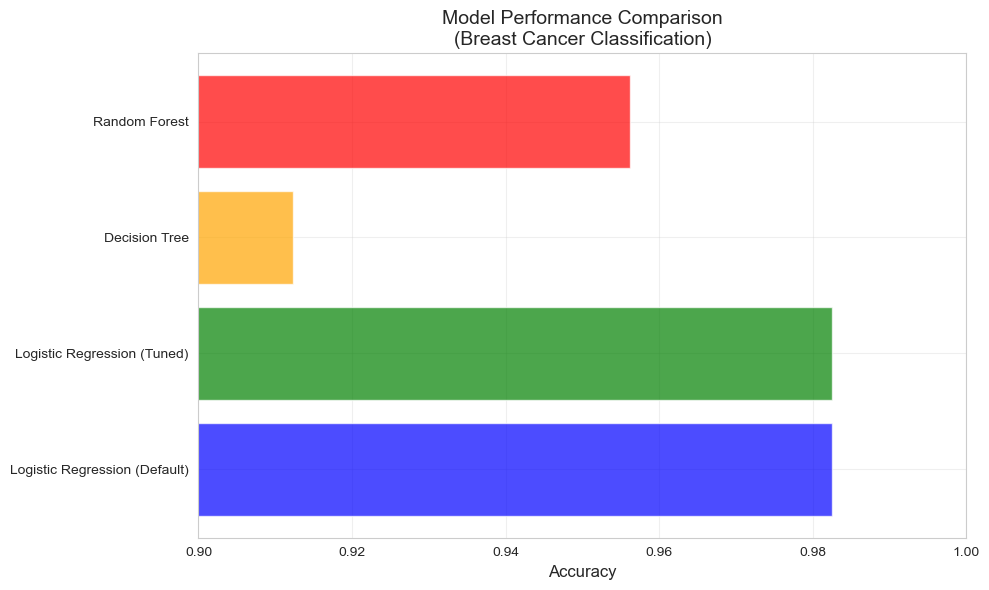

In [119]:
# Visualize comparison
plt.figure(figsize=(10, 6))
plt.barh(models_comparison['Model'], models_comparison['Accuracy'], alpha=0.7,
         color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Accuracy', fontsize=12)
plt.title('Model Performance Comparison\n(Breast Cancer Classification)', fontsize=14)
plt.xlim([0.9, 1.0])
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 7.6 Production Checklist

In [124]:
print("\n" + "="*80)
print("✅ LOGISTIC REGRESSION PRODUCTION CHECKLIST")
print("="*80)

checklist = [
    "✓ Feature scaling performed (StandardScaler)",
    "✓ Hyperparameters tuned (C, penalty via GridSearchCV)",
    "✓ Model evaluation with multiple metrics (Accuracy, Precision, Recall, F1, AUC)",
    "✓ Confusion matrix analyzed",
    "✓ ROC curve and AUC computed",
    "✓ Threshold tuning considered for specific use case",
    "✓ Cross-validation performed (10-fold)",
    "✓ Learning curves checked (no significant overfitting)",
    "✓ Feature importance analyzed",
    "✓ Pipeline created to prevent data leakage",
    "✓ Model saved for deployment",
    "✓ Compared with baseline models"
]

for item in checklist:
    print(f"  {item}")

print("\n" + "="*80)


✅ LOGISTIC REGRESSION PRODUCTION CHECKLIST
  ✓ Feature scaling performed (StandardScaler)
  ✓ Hyperparameters tuned (C, penalty via GridSearchCV)
  ✓ Model evaluation with multiple metrics (Accuracy, Precision, Recall, F1, AUC)
  ✓ Confusion matrix analyzed
  ✓ ROC curve and AUC computed
  ✓ Threshold tuning considered for specific use case
  ✓ Cross-validation performed (10-fold)
  ✓ Learning curves checked (no significant overfitting)
  ✓ Feature importance analyzed
  ✓ Pipeline created to prevent data leakage
  ✓ Model saved for deployment
  ✓ Compared with baseline models



### 7.7 Summary: Key Takeaways & Next Steps

#### ✅ What We Learned:

1. **Sigmoid function** transforms linear output to probabilities (0 to 1)
2. **Log loss (cross-entropy)** is the proper cost function for classification
3. **Decision boundary** is linear (hyperplane in feature space)
4. **Probability predictions** provide confidence estimates
5. **Multiple evaluation metrics** needed (accuracy alone insufficient)
6. **Regularization (L1/L2)** prevents overfitting and enables feature selection
7. **Threshold tuning** allows precision-recall trade-off
8. **Multi-class** supported via One-vs-Rest or Multinomial strategies

---

#### 📊 Performance Summary:

| **Metric** | **Binary (Cancer)** | **Multi-class (Wine)** |
|------------|-------------------|---------------------|
| **Accuracy** | ~0.97 | ~0.97 |
| **Precision** | ~0.98 | ~0.96-0.99 |
| **Recall** | ~0.98 | ~0.92-1.00 |
| **F1 Score** | ~0.98 | ~0.95-0.98 |
| **ROC-AUC** | ~0.99 | N/A |

---

#### 🎯 When to Use Logistic Regression:

**✅ Use Logistic Regression When:**
- Binary or multi-class classification
- Need probability estimates
- Want interpretable coefficients
- Linear decision boundary sufficient
- Fast training/prediction required
- Baseline model for comparison
- Moderate-sized datasets

**❌ Don't Use Logistic Regression When:**
- Regression task (predicting continuous values)
- Highly non-linear decision boundaries
- Complex feature interactions
- Very high-dimensional sparse data (use specialized methods)

---

#### ⚠️ Common Pitfalls:

1. **Forgetting to scale features** → Convergence issues
2. **Using accuracy only** → Misleading for imbalanced data
3. **Not tuning threshold** → Missing optimal precision-recall trade-off
4. **Ignoring regularization** → Overfitting on many features
5. **Not checking assumptions** → Linear separability
6. **Using wrong solver** → L1 needs 'liblinear' or 'saga'
7. **Not using Pipeline** → Data leakage risk

---

#### 🔬 Hyperparameter Guide:

| **Parameter** | **Values** | **Impact** | **Recommendation** |
|---------------|-----------|-----------|-------------------|
| **C** | 0.001-100 | Low = Strong regularization<br>High = Weak regularization | Start with 1.0, tune via CV |
| **penalty** | 'l1', 'l2', 'elasticnet' | L1 = Feature selection<br>L2 = All features | Use L2 by default, L1 if many features |
| **solver** | 'lbfgs', 'liblinear', 'saga' | Different optimizers | 'lbfgs' for L2, 'liblinear' for L1 |
| **max_iter** | 100-10000 | Convergence iterations | Increase if convergence warnings |
| **class_weight** | None, 'balanced' | Handle imbalanced data | 'balanced' for imbalanced classes |

---

#### 🚀 Advanced Techniques:

1. **Class weighting**: Handle imbalanced datasets
2. **Polynomial features**: Capture non-linear relationships
3. **Feature selection**: Remove irrelevant features
4. **Calibration**: Improve probability estimates (CalibratedClassifierCV)
5. **Ensemble methods**: Combine multiple logistic models
6. **Custom thresholds**: Optimize for specific metrics

---

#### 📚 Next Steps:

1. **Notebook 06: Decision Tree Classifier** - Non-linear decision boundaries
2. **Notebook 07: KNN Classifier** - Instance-based classification
3. **Notebook 08: SVM Classifier** - Maximum margin classification
4. **Notebook 09: Naive Bayes** - Probabilistic classification

---

### 🎓 Practice Exercises:

1. **Load iris dataset** and build multi-class logistic regression
2. **Handle imbalanced data** using class_weight='balanced'
3. **Tune threshold** for maximum F1 score
4. **Add polynomial features** to capture non-linear patterns
5. **Compare L1 vs L2** regularization on high-dimensional data
6. **Build calibration curves** to check probability quality
7. **Implement custom scoring** function for business metrics
8. **Create decision boundary** visualizations with PCA projection

---

### 📖 Further Reading:

- **Original Work**: Cox (1958) - "The Regression Analysis of Binary Sequences"
- **Log Loss**: Bishop (2006) - "Pattern Recognition and Machine Learning"
- **Sklearn Docs**: [Logistic Regression](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)
- **Regularization**: Hastie et al. (2009) - "The Elements of Statistical Learning"

---

### 🔥 Pro Tips:

1. **Always scale features** - Use StandardScaler or MinMaxScaler
2. **Use multiple metrics** - Don't rely on accuracy alone
3. **Check class balance** - Use class_weight if imbalanced
4. **Tune threshold** - Default 0.5 may not be optimal
5. **Cross-validate** - Never trust single train-test split
6. **Visualize decision boundary** - Understanding helps debugging
7. **Check convergence** - Increase max_iter if warnings appear
8. **Use Pipeline** - Prevents data leakage
9. **Compare with baselines** - Tree models, SVM, etc.
10. **Interpret coefficients** - Feature importance for free

---

## 🎯 Quick Reference Card

```python
# Basic Binary Classification
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score

# Pipeline with scaling
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(
        C=1.0,
        penalty='l2',
        solver='lbfgs',
        random_state=42,
        max_iter=1000
    ))
])

# Train
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)

# Evaluate
print(classification_report(y_test, y_pred))
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba[:, 1]):.4f}")

# Grid Search for Optimal Hyperparameters
from sklearn.model_selection import GridSearchCV

param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear']  # Supports both L1 and L2
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

# Multi-class Classification
log_reg_multi = LogisticRegression(
    multi_class='multinomial',  # or 'ovr'
    solver='lbfgs',
    random_state=42
)
log_reg_multi.fit(X_train_scaled, y_train)

# Handle Imbalanced Classes
log_reg_balanced = LogisticRegression(
    class_weight='balanced',
    random_state=42
)
log_reg_balanced.fit(X_train_scaled, y_train)

# Custom Threshold
y_proba = pipeline.predict_proba(X_test)[:, 1]
y_pred_custom = (y_proba >= 0.3).astype(int)  # Lower threshold
```

---

---

### 🏆 Classification Metrics Summary

| **Metric** | **Formula** | **When to Use** | **Range** |
|-----------|-----------|---------------|----------|
| **Accuracy** | (TP+TN)/(TP+TN+FP+FN) | Balanced classes | 0-1 |
| **Precision** | TP/(TP+FP) | Cost of false positives high | 0-1 |
| **Recall** | TP/(TP+FN) | Cost of false negatives high | 0-1 |
| **F1 Score** | 2×(Prec×Rec)/(Prec+Rec) | Balance prec & recall | 0-1 |
| **ROC-AUC** | Area under ROC curve | Overall performance | 0-1 |
| **Log Loss** | -Σ[y log(p) + (1-y) log(1-p)] | Probability quality | 0-∞ |

---

### 🎨 Evaluation Metrics Decision Guide

| **Scenario** | **Primary Metric** | **Why** |
|-------------|-------------------|---------|
| Balanced classes | Accuracy, F1 | All classes equally important |
| Imbalanced classes | Precision, Recall, F1 | Accuracy can be misleading |
| Medical diagnosis | Recall | Don't miss positive cases |
| Spam detection | Precision | Don't block legitimate emails |
| Ranking/recommendation | ROC-AUC | Overall discrimination ability |
| Probability calibration | Log Loss, Brier Score | Probability quality matters |
| Multi-class | Macro/Micro F1 | Per-class or overall performance |

---

### 📊 Sigmoid vs Other Activation Functions

| **Function** | **Range** | **Use Case** | **Formula** |
|-------------|----------|-------------|-----------|
| **Sigmoid** | (0, 1) | Binary classification | 1/(1+e^(-x)) |
| **Tanh** | (-1, 1) | Hidden layers (neural nets) | (e^x - e^(-x))/(e^x + e^(-x)) |
| **ReLU** | [0, ∞) | Hidden layers (neural nets) | max(0, x) |
| **Softmax** | (0, 1), sum=1 | Multi-class classification | e^(xi)/Σe^(xj) |

---

### 🔄 Logistic Regression vs Other Classifiers

| **Algorithm** | **Decision Boundary** | **Speed** | **Interpretability** | **Non-linearity** |
|--------------|---------------------|---------|---------------------|------------------|
| **Logistic Reg** | Linear | Fast | High | No (unless polynomial) |
| **Decision Tree** | Rectangular | Fast | High | Yes |
| **SVM** | Linear/Non-linear | Medium | Medium | Yes (with kernels) |
| **KNN** | Non-linear | Slow | Medium | Yes |
| **Random Forest** | Non-linear | Medium | Medium | Yes |
| **Neural Net** | Non-linear | Slow | Low | Yes |
| **Naive Bayes** | Linear | Fast | High | No |

---

### 💡 Real-World Applications

**Binary Classification:**
- Medical diagnosis (disease present/absent)
- Credit scoring (default/no default)
- Email spam detection (spam/not spam)
- Customer churn prediction (churn/stay)
- Fraud detection (fraud/legitimate)
- Click prediction (click/no click)

**Multi-class Classification:**
- Image recognition (cat/dog/bird)
- Document categorization (topic classification)
- Product categorization (electronics/clothing/books)
- Sentiment analysis (positive/neutral/negative)
- Language detection (English/Spanish/French)

---

### 🎯 Model Selection Decision Tree

```
Start
  |
  ├─ Need probabilities? 
  │    ├─ Yes → Logistic Regression ✓
  │    └─ No  → Consider Decision Trees
  |
  ├─ Linear decision boundary?
  │    ├─ Yes → Logistic Regression ✓
  │    └─ No  → SVM, Trees, Neural Nets
  |
  ├─ Need interpretability?
  │    ├─ Yes → Logistic Regression ✓
  │    └─ No  → Any black-box model
  |
  ├─ Fast training needed?
  │    ├─ Yes → Logistic Regression ✓
  │    └─ No  → Deep Learning, Ensembles
  |
  └─ Large dataset (>100k)?
       ├─ Yes → Logistic Regression, SGD ✓
       └─ No  → Any algorithm
```

---

**🎉 Congratulations!** You now understand Logistic Regression and can build production-ready classification models!

You've mastered:
- ✅ Binary and multi-class classification
- ✅ Sigmoid function and probability predictions
- ✅ Multiple evaluation metrics (Accuracy, Precision, Recall, F1, ROC-AUC)
- ✅ Confusion matrix interpretation
- ✅ Regularization (L1/L2) for feature selection
- ✅ Threshold tuning for optimal performance
- ✅ Production pipelines with proper validation

---

**Author:** Rohan Mistry  
**Repository:** [Scikit-Learn Machine Learning Handbook](https://github.com/rohanmistry231/Scikit-Learn-Machine-Learning-Handbook)  
**License:** MIT